In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/kir/KIR_development/bin/imports.ipynb")
execute_notebook("/cellar/users/ramarty/Projects/kir/KIR_development/data_gathering/alternate/sample_mapping.ipynb")

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


## Are the anchor genes a valuable tool for normalizing?

Do they represent coverage well? Maybe in comparison to the fourmers? <br>
How tightly do other anchor genes cluster when normalized by them? 

In [101]:
df_whole = pd.concat([pd.read_csv('/cellar/users/ramarty/Data/kir/components/alternate/components_four_read_counts.csv', index_col=0),
                      pd.read_csv('/cellar/users/ramarty/Data/kir/components/tcga/components_four_read_counts.csv', index_col=0)])
samples = population_dictionary_stripped[population_dictionary.keys()[0]]
#df_whole = df_whole.ix[samples].dropna()
len(samples)

230

#### 3DL3

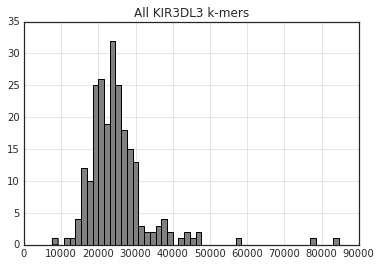

In [13]:
df_whole[kmers[20]['KIR3DL3']].sum(axis=1).hist(bins=50, color='grey')
plt.title('All KIR3DL3 k-mers')

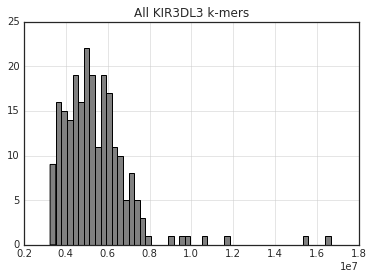

In [17]:
df_whole[four_mers].min(axis=1).hist(bins=50, color='grey')
plt.title('All KIR3DL3 k-mers')

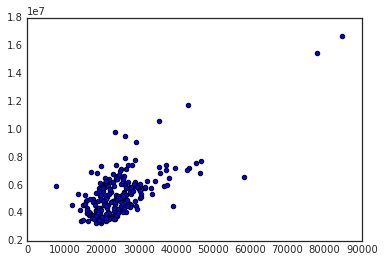

In [22]:
plt.scatter(df_whole[kmers[20]['KIR3DL3']].sum(axis=1), df_whole[four_mers].min(axis=1))

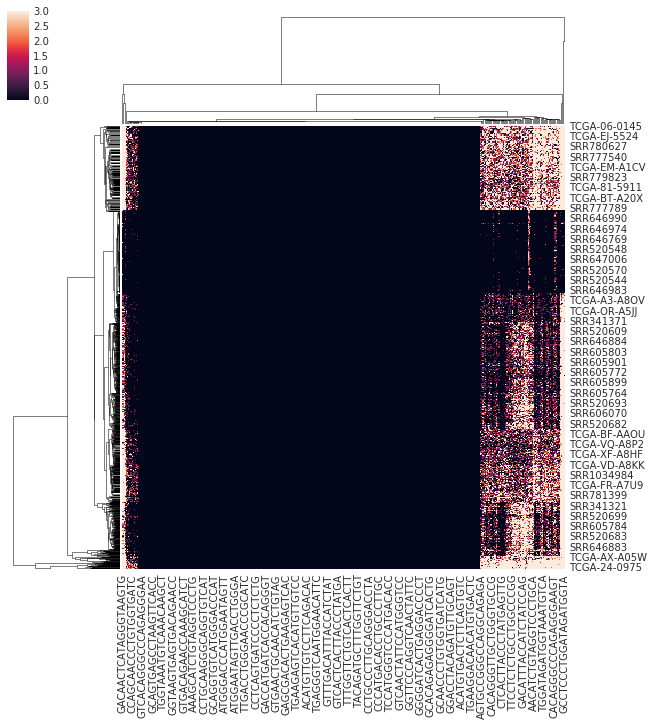

In [104]:
sns.clustermap(df_whole.ix[[x for x in df_whole.index if x not in low_coverage_patients], kmers[20]['KIR3DL3']], vmax=3)

#### Raw counts across the populations

In [2]:
df_whole = pd.concat([pd.read_csv('/cellar/users/ramarty/Data/kir/components/alternate/components_four_read_counts.csv', index_col=0),
                      pd.read_csv('/cellar/users/ramarty/Data/kir/components/tcga/components_four_read_counts.csv', index_col=0)])

In [3]:
large_populations, size = [], []
for i, population in enumerate(population_dictionary.keys()):
    samples = population_dictionary_stripped[population]
    df_tmp = df_whole.ix[samples].dropna()
    if len(df_tmp) > population_size_cutoff:
        large_populations.append(population)
        size.append(len(df_tmp))
plotting_df = pd.DataFrame({'Population': large_populations,
                            'Size': size})
plotting_df = plotting_df.sort_values('Size', ascending=False)

In [4]:
# exclude low coverage
df_whole = df_whole.ix[[x for x in df_whole.index if x not in low_coverage_patients]]

In [5]:
palette = sns.color_palette("hls", len(large_populations))

TCGA 1032
2017_dbGap_phs000209.v13.p3_MESA 596
2017_dbGap_phs000291.v2.p1_NHLBILungCOPD 376
2017_dbGap_phs000179.v5.p2_GenEpidCOPD 291
TCGA_agilent 354
2017_dbGap_phs000254.v2.p1_NHLBILungCF 227
2017_dbGap_phs000422.v1.p1_NHLBILungA 182
2017_dbGap_phs000290.v1.p1_NHLBILungPAH 142
KIR3DL3


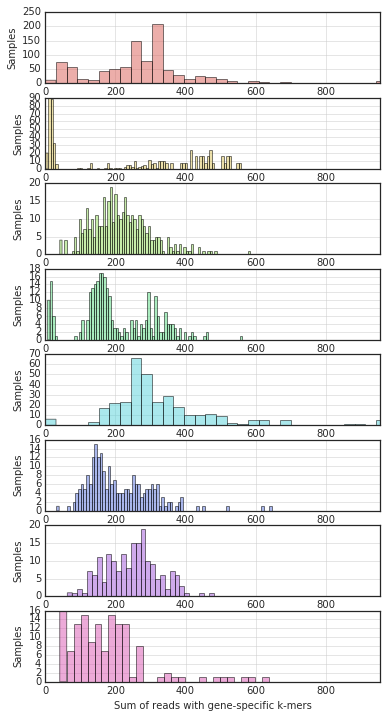

TCGA 1032
2017_dbGap_phs000209.v13.p3_MESA 596
2017_dbGap_phs000291.v2.p1_NHLBILungCOPD 376
2017_dbGap_phs000179.v5.p2_GenEpidCOPD 291
TCGA_agilent 354
2017_dbGap_phs000254.v2.p1_NHLBILungCF 227
2017_dbGap_phs000422.v1.p1_NHLBILungA 182
2017_dbGap_phs000290.v1.p1_NHLBILungPAH 142
KIR3DP1


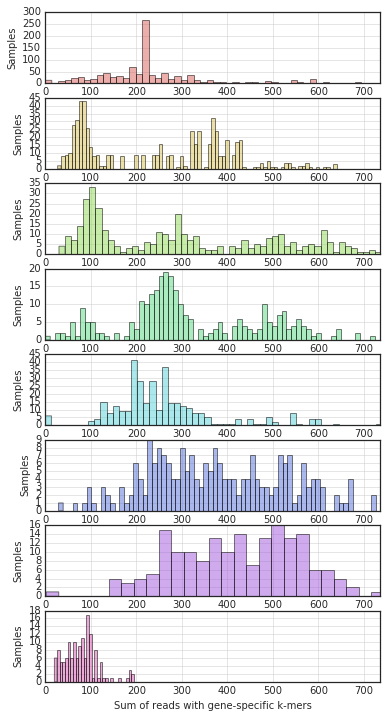

TCGA 1032
2017_dbGap_phs000209.v13.p3_MESA 596
2017_dbGap_phs000291.v2.p1_NHLBILungCOPD 376
2017_dbGap_phs000179.v5.p2_GenEpidCOPD 291
TCGA_agilent 354
2017_dbGap_phs000254.v2.p1_NHLBILungCF 227
2017_dbGap_phs000422.v1.p1_NHLBILungA 182
2017_dbGap_phs000290.v1.p1_NHLBILungPAH 142
KIR2DL4


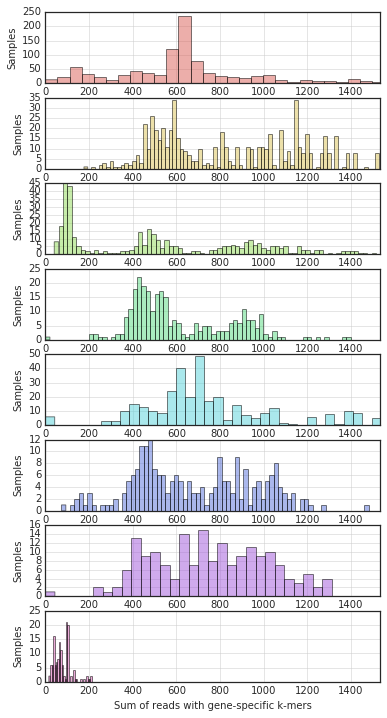

TCGA 1032
2017_dbGap_phs000209.v13.p3_MESA 596
2017_dbGap_phs000291.v2.p1_NHLBILungCOPD 376
2017_dbGap_phs000179.v5.p2_GenEpidCOPD 291
TCGA_agilent 354
2017_dbGap_phs000254.v2.p1_NHLBILungCF 227
2017_dbGap_phs000422.v1.p1_NHLBILungA 182
2017_dbGap_phs000290.v1.p1_NHLBILungPAH 142
KIR3DL2


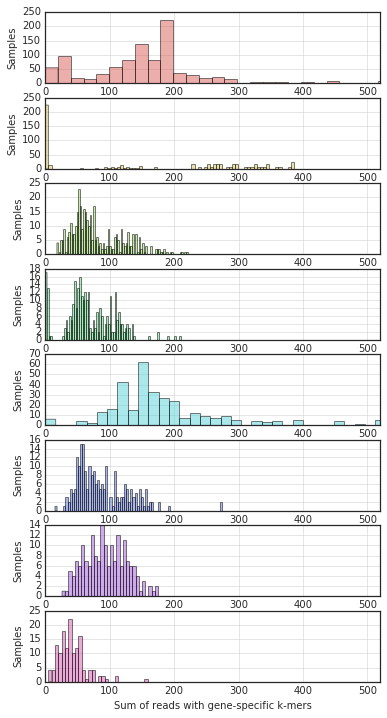

In [13]:
k = 20
for gene in anchor_genes:
    f, axarr = plt.subplots(4, sharex=True, figsize=(6, 12))
    # add color
    minimum, maximum = df_whole[kmers[k][gene]].sum(axis=1).min(), df_whole[kmers[k][gene]].sum(axis=1).quantile(.975)
    
    for i, population in enumerate(plotting_df.Population):
        try:
            
            samples = population_dictionary_stripped[population]
            df_tmp = df_whole.ix[samples].dropna()
            plt.subplot(len(large_populations), 1, i+1)
            if len(samples) > 200:
                df_tmp[kmers[k][gene]].sum(axis=1).hist(bins=80, alpha=0.5, color=palette[i])
            else: 
                df_tmp[kmers[k][gene]].sum(axis=1).hist(bins=30, alpha=0.5, color=palette[i])
            plt.xlim(minimum, maximum)
            plt.ylabel('Samples')
            plt.xlabel('Sum of reads with gene-specific k-mers')
            print population, len(df_tmp)
        except:
            print population
    #f.suptitle(gene)
    print gene
    plt.show()
    plt.clf()

#### Isolate the patients with un-usable coverage

In [7]:
gene = anchor_genes[0]

In [8]:
low_anchor1_coverage = []
for i, population in enumerate(plotting_df.Population):
    samples = population_dictionary_stripped[population]
    df_tmp = df_whole.ix[samples].dropna()
    low_anchor1_coverage.extend(list(df_tmp[kmers[20][gene]].sum(axis=1)[df_tmp[kmers[20][gene]].sum(axis=1) < 10].index))
    print population, len(list(df_tmp[kmers[20][gene]].sum(axis=1)[df_tmp[kmers[20][gene]].sum(axis=1) < 10].index))

TCGA 9
2017_dbGap_phs000209.v13.p3_MESA 35
2017_dbGap_phs000291.v2.p1_NHLBILungCOPD 0
2017_dbGap_phs000179.v5.p2_GenEpidCOPD 6
TCGA_agilent 6
2017_dbGap_phs000254.v2.p1_NHLBILungCF 0
2017_dbGap_phs000422.v1.p1_NHLBILungA 0
2017_dbGap_phs000290.v1.p1_NHLBILungPAH 0


In [9]:
gene = anchor_genes[3]
low_anchor4_coverage = []
for i, population in enumerate(plotting_df.Population):
    samples = population_dictionary_stripped[population]
    df_tmp = df_whole.ix[samples].dropna()
    low_anchor4_coverage.extend(list(df_tmp[kmers[20][gene]].sum(axis=1)[df_tmp[kmers[20][gene]].sum(axis=1) < 1].index))
    print population, len(list(df_tmp[kmers[20][gene]].sum(axis=1)[df_tmp[kmers[20][gene]].sum(axis=1) < 1].index))

TCGA 8
2017_dbGap_phs000209.v13.p3_MESA 39
2017_dbGap_phs000291.v2.p1_NHLBILungCOPD 0
2017_dbGap_phs000179.v5.p2_GenEpidCOPD 2
TCGA_agilent 6
2017_dbGap_phs000254.v2.p1_NHLBILungCF 0
2017_dbGap_phs000422.v1.p1_NHLBILungA 0
2017_dbGap_phs000290.v1.p1_NHLBILungPAH 0


In [10]:
## Is there some equation I can use based on the population coverage and median? 

In [11]:
# compare overlap between first and last anchor gene
print len(low_anchor1_coverage), len(low_anchor4_coverage), len([x for x in low_anchor1_coverage if x in low_anchor4_coverage])

56 55 18


In [12]:
[x for x in low_anchor1_coverage if x in low_anchor4_coverage]

['TCGA-EE-A2ML',
 'TCGA-XJ-A9DI',
 'TCGA-21-1070',
 'TCGA-21-1070',
 'TCGA-21-1070',
 'TCGA-21-1070',
 'TCGA-D1-A0ZR',
 'TCGA-DJ-A3US',
 'SRR646755',
 'SRR646822',
 'SRR646834',
 'SRR646913',
 'TCGA-21-1070',
 'TCGA-21-1070',
 'TCGA-21-1070',
 'TCGA-21-1070',
 'TCGA-DJ-A3US',
 'TCGA-XJ-A9DI']